# analysis of particles in analytical flows

In [19]:
# import needed packages


import numpy as np
import xarray as xr 
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use('../python_style_Meike.mplstyle')

#set directories
#set input and output directories
base_directory='/storage/shared/oceanparcels/output_data/data_Meike/MR_advection/'

# set files 
input_directory_particles=base_directory + 'particle_simulations/'
input_files_particles = np.array(['tracer_particles_RK4_dt2_Kaufmann_vortex.zarr','tracer_particles_EE_dt2_Kaufmann_vortex.zarr','tracer_particles_EE_dt002_Kaufmann_vortex.zarr'])

input_file_flow = base_directory + 'fieldsets/kaufmann_vortex_field.nc' 

In [ ]:
dataset={}
for i in range(input_files_particles.size):
    dataset[i]=xr.open_zarr(input_directory_particles+input_files_particles[i],decode_times= False)


flowset=xr.open_dataset(input_file_flow,decode_times=False)

In [ ]:
#plot analytical flow
fig,ax=plt.subplots()
lonsflow=flowset['lon'].values
latsflow=flowset['lat'].values
longrid,latsgrid= np.meshgrid(lonsflow,latsflow)
Uflow=flowset['U'][0,:,:].values
Vflow=flowset['V'][0,:,:].values

ax.streamplot(longrid,latsgrid,Uflow,Vflow,color='k')
pcm=ax.pcolormesh(longrid,latsgrid,np.sqrt(Uflow**2+Vflow**2),cmap='Blues')
ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
cbar=fig.colorbar(pcm,label='speed')



In [ ]:
#plot particles
titlelist=['RK4, dt=2','EE dt=2','EE dt=0.02']
for i in range(3):
    lonp=dataset[i]['lon'].values
    latp=dataset[i]['lat'].values
    print()
    tmax=250-1
    fig,ax=plt.subplots()
    ax.plot(lonp[:,:tmax+1].T,latp[:,:tmax+1].T,color='black')
    ax.plot(lonp[:,0].T,latp[:,0].T,'>',color='green')
    ax.plot(lonp[:,tmax].T,latp[:,tmax].T,'s',color='red')
    pcm=ax.pcolormesh(longrid,latsgrid,np.sqrt(Uflow**2+Vflow**2),cmap='Blues')
    ax.set_ylim(-30,30)
    ax.set_xlim(-30,30)
    ax.set_title(titlelist[i])



lonp[:,-1]

# Conclusion testing some settings
I did perform several simulations with different settings, and the timestepping determines how well the particle follows the field (the RK4 outperforms the EE with a landslide, dt=2 still workds for RK4 while EE does not work. Need dt=0.02 for EE to get something ok

In [55]:
## testing MR settings
datasetMR={}
names=np.array(['Inertia_particle_Kaufmann_vortex_EC_B080_tau1E0.zarr',
                'Inertia_particle_Kaufmann_vortex_EC_B100_tau1E0.zarr',
                'Inertia_particle_Kaufmann_vortex_EC_B120_tau1E0.zarr',
                'Inertia_particle_Kaufmann_vortex_RK4_B080_tau1E0.zarr',
                'Inertia_particle_Kaufmann_vortex_RK4_B100_tau1E0.zarr',
                'Inertia_particle_Kaufmann_vortex_RK4_B120_tau1E0.zarr', 
                'Inertia_particle_Kaufmann_vortex_SM_RK4_B080_tau1E0.zarr',
                'Inertia_particle_Kaufmann_vortex_SM_RK4_B100_tau1E0.zarr',
                'Inertia_particle_Kaufmann_vortex_SM_RK4_B120_tau1E0.zarr', 
                'Inertia_particle_Kaufmann_vortex_SM_RK4_B080_tau1E-1.zarr', 
                'Inertia_particle_Kaufmann_vortex_SM_RK4_B100_tau1E-1.zarr', 
                'Inertia_particle_Kaufmann_vortex_SM_RK4_B120_tau1E-1.zarr',
    ])
for i in range(len(names)):
    datasetMR[i]=xr.open_zarr(input_directory_particles+names[i],decode_times=False)

tmax=999

# 'Inertia_particle_Kaufmann_vortex_RK4_v2_B080_tau1E0.zarr',
#     'Inertia_particle_Kaufmann_vortex_RK4_v2_B100_tau1E0.zarr',
#     'Inertia_particle_Kaufmann_vortex_RK4_v2_B120_tau1E0.zarr'



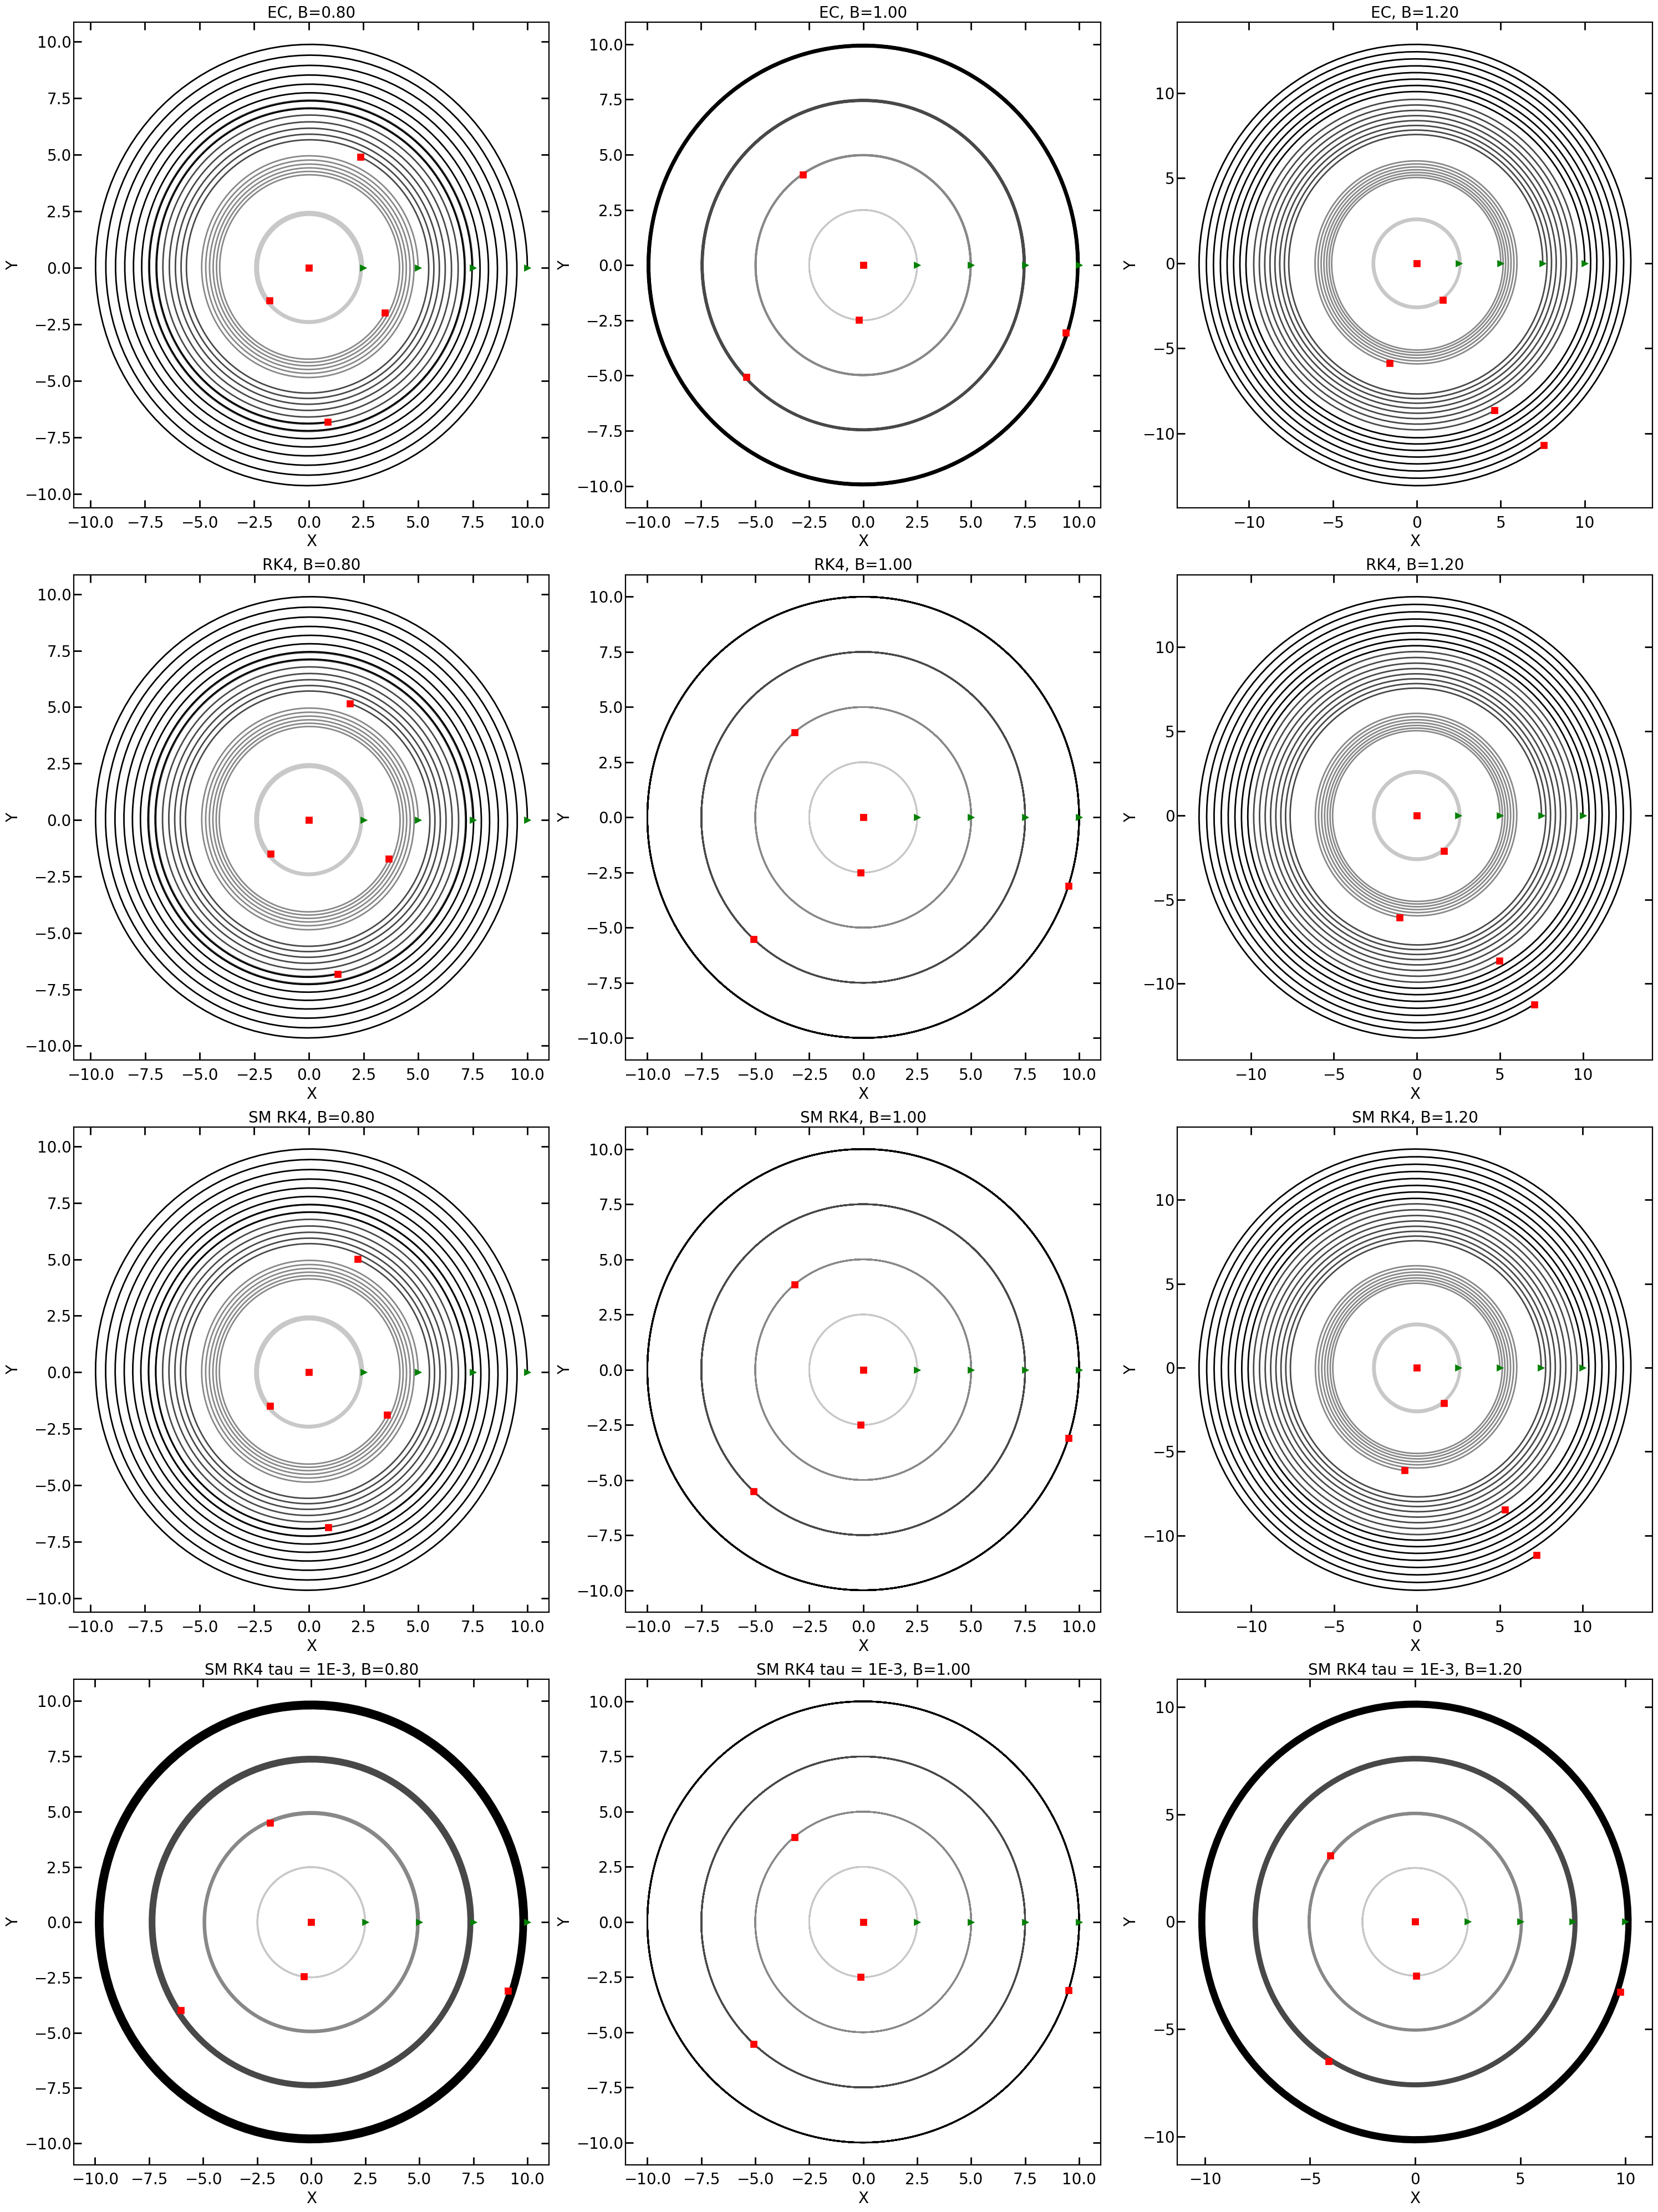

In [58]:
fig,axs=plt.subplots(4,3,figsize=(30,40))
n=0
m=0



nparticles=datasetMR[0].attrs['nparticles']
cmap = plt.get_cmap('Grays')
greyarray=cmap(np.linspace(0.1,1,nparticles))


integration=np.array(['EC','RK4','SM RK4', 'SM RK4 tau = 1E-3'])
Barray=np.array([0.8,1.0,1.2,0.8,1.0,1.2,0.8,1.0,1.2,0.8,1.0,1.2])


for i in range(len(names)):
    lonp=datasetMR[i]['lon'][:,:tmax+1].values
    latp=datasetMR[i]['lat'][:,:tmax+1].values
    for j in range(nparticles):
        axs[m,n].plot(lonp[j],latp[j],color=greyarray[j],zorder=-20)
    axs[m,n].plot(lonp[:,0].T,latp[:,0].T,'>',color='green')
    axs[m,n].plot(lonp[:,-1].T,latp[:,-1].T,'s',color='red')
    axs[m,n].set_title(integration[m]+", B={:.02f}".format(Barray[i]),fontsize=20)
    axs[m,n].set_xlabel('X')
    axs[m,n].set_ylabel('Y')
#ax.scatter(lonp.T,latp.T,c=time.T, cmap='viridis')

    n+=1
    if(n%3==0):
        n=0
        m+=1
        
    
# ax.set_xlim(2.45,2.55)
# ax.set_ylim(-0.1,0.1)

fig.tight_layout()
fig.savefig('../figures/MR_advection_kaufmann_vortext_B_EC_and_RK4.pdf')


In [ ]:
lonp=datasetMR[i]['lon'][:,:tmax+1].values
    latp=datasetMR[i]['lat'][:,:tmax+1].values
    for j in range(nparticles):
        axs[m,n].plot(lonp[j],latp[j],color=greyarray[j],zorder=-20)
    axs[m,n].plot(lonp[:,0].T,latp[:,0].T,'>',color='green')
    axs[m,n].plot(lonp[:,-1].T,latp[:,-1].T,'s',color='red')
    axs[m,n].set_title(integration[m]+", B={:.02f}".format(Barray[i]),fontsize=20)
    axs[m,n].set_xlabel('X')
    axs[m,n].set_ylabel('Y')

# 3D advection cylinder flows

## symmetric flow

In [60]:
# tracer particles
input_directory_particles=base_directory + 'particle_simulations/'
input_files_particles3D = np.array(['tracer_particle_cylinder_flow_symmetric_3D_RK4.zarr', # 0 
                                    'tracer_particle_cylinder_flow_assymmetric_3D_RK4.zarr', #1 
                                    'tracer_particle_cylinder_periodic_flow_assymmetric_3D_RK4.zarr', # 2
                                    'inertia_particle_cylinder_steady_flow_symmetric_3D_EC.zarr', # 3
                                    'inertia_particle_cylinder_steady_flow_assymmetric_3D_EC.zarr', # 4
                                    'inertia_particle_cylinder_periodic_flow_assymmetric_3D_EC.zarr', # 5
                                    'inertia_particle_cylinder_steady_flow_symmetric_3D_RK4.zarr', #6
                                    'inertia_particle_cylinder_steady_flow_assymmetric_3D_RK4.zarr', #7
                                    'inertia_particle_cylinder_steady_flow_assymmetric_3D_EE.zarr', #8 
                                    'inertia_particle_cylinder_steady_flow_symmetric_3D_RK4_v2.zarr', # 9
                                    'inertia_particle_cylinder_steady_flow_assymmetric_3D_RK4_v2.zarr', # 10
                                    'inertia_particle_cylinder_periodic_flow_assymmetric_3D_RK4_v2.zarr', # 11
                                    'inertia_particle_cylinder_steady_flow_symmetric_3D_SM_RK4.zarr' #12
                                    ]) 
input_file_flow3D = base_directory + 'fieldsets/cylinder_flow_symmetric_3D.nc' 

dataset3D={}
for i in range(input_files_particles3D.size):
    dataset3D[i]=xr.open_zarr(input_directory_particles+input_files_particles3D[i],decode_times= False)


flowset3D=xr.open_dataset(input_file_flow3D,decode_times=False)

print(dataset3D[0])

<xarray.Dataset> Size: 404kB
Dimensions:     (trajectory: 20, obs: 1000)
Coordinates:
  * obs         (obs) int32 4kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * trajectory  (trajectory) int64 160B 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19
Data variables:
    Bterm       (trajectory) float32 80B dask.array<chunksize=(20,), meta=np.ndarray>
    lat         (trajectory, obs) float32 80kB dask.array<chunksize=(20, 100), meta=np.ndarray>
    lon         (trajectory, obs) float32 80kB dask.array<chunksize=(20, 100), meta=np.ndarray>
    tau_inv     (trajectory) float32 80B dask.array<chunksize=(20,), meta=np.ndarray>
    time        (trajectory, obs) float64 160kB dask.array<chunksize=(20, 100), meta=np.ndarray>
    z           (trajectory, obs) float32 80kB dask.array<chunksize=(20, 100), meta=np.ndarray>
Attributes: (12/13)
    Conventions:            CF-1.6/CF-1.7
    delta_t:                0.05
    delta_x:                0.004999995231628418
    delta_y:                0.004999

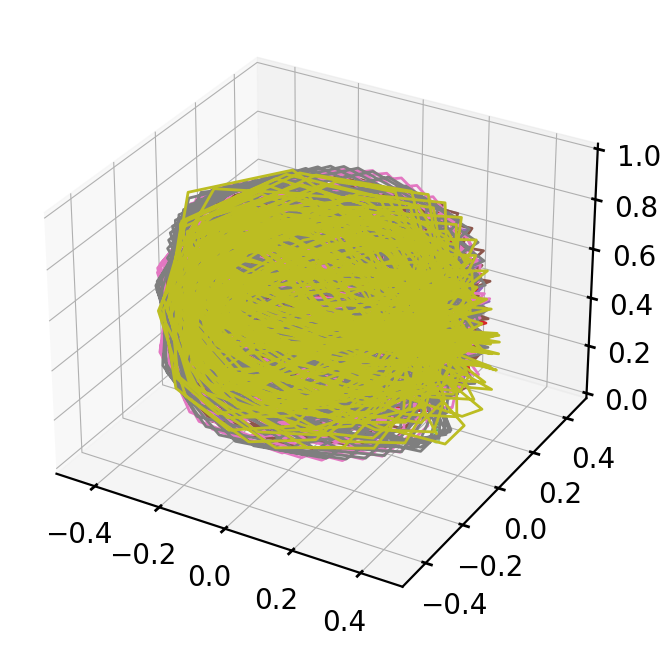

In [61]:
#plot particles with matplotlib it works but has to be made pretty

i=12
titlelist=['RK4, dt=2','EE dt=2','EE dt=0.02']
lonp=dataset3D[i]['lon'].values
latp=dataset3D[i]['lat'].values
depthp=dataset3D[i]['z'].values

tstartlist=np.array([0,490,990])
tstart=0#990
DT=10
tmax=1000-1#1000-1

fig=plt.figure()
ax = fig.add_subplot( projection='3d',computed_zorder=False)
nparticles=nparticles=dataset3D[i].attrs['nparticles']
cmap = plt.get_cmap('Grays')
greyarray=cmap(np.linspace(1,0.4,nparticles))
tstart=0

for n in range(nparticles-1,0,-1): 
    ax.plot(lonp[n,tstart:tmax+1],latp[n,tstart:tmax+1],depthp[n,tstart:tmax+1])

ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.set_zlim(0,1)

# ax.scatter(lonp[:,tmax],latp[:,tmax],depthp[:,tmax],color='red')
tstart=0
ax.scatter(lonp[:,tstart],latp[:,tstart],depthp[:,tstart],color='green')


In [64]:
# plot particles using plotly.express
i=6
print(input_files_particles3D[i])
print((dataset3D[i].attrs['dt']))
if(i>2):
    # print(dataset3D[i]['tau'].values[0])
    print(dataset3D[i]['w0'].values[0])
titlelist=['RK4, dt=2','EE dt=2','EE dt=0.02']
lonp=dataset3D[i]['lon'].values
latp=dataset3D[i]['lat'].values
depthp=dataset3D[i]['z'].values
nparticles=dataset3D[i].attrs['nparticles']

import plotly.express as px

tstart=100
tstop=-1
fig = px.scatter_3d()#x=lonp[4,:],y=latp[4,:],z=depthp[4,:])
for m in range(1,nparticles,4):
    fig.add_scatter3d(x=lonp[m,tstart:tstop],y=latp[m,tstart:tstop],z=depthp[m,tstart:tstop])
fig.update_traces(marker_size = 1)
fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=4, range=[-0.5,0.5],),
                     yaxis = dict(nticks=4, range=[-0.6,0.5],),
                     zaxis = dict(nticks=4, range=[0,1],),),
    width=1000,
    height=1000,
    margin=dict(r=20, l=10, b=10, t=10))
fig.show()

#fig.write_image("../figures/test1.png")


inertia_particle_cylinder_steady_flow_symmetric_3D_RK4.zarr
0.1
0.14939086


In [16]:
# plot particles using plotly.express
i=11
titlelist=['RK4, dt=2','EE dt=2','EE dt=0.02']
lonp=dataset3D[i]['lon'].values
latp=dataset3D[i]['lat'].values
depthp=dataset3D[i]['z'].values
nparticles=nparticles=dataset3D[i].attrs['nparticles']

import plotly.express as px

dtstep=9
fig = px.scatter_3d()#x=lonp[0,:][lonp[0,:]<0],y=latp[0,:][lonp[0,:]<0],z=depthp[0,:][lonp[0,:]<0])
for m in range(0,nparticles,1):

    fig.add_scatter3d(x=lonp[m,::dtstep][latp[m,::dtstep]<0.01],y=latp[m,::dtstep][latp[m,::dtstep]<0.01],z=depthp[m,::dtstep][latp[m,::dtstep]<0.01])
fig.update_traces(mode='markers',marker_size = 3)
fig.show()

tested several integration timesteps 
till dt<=0.1 it is fine above it its starting to go wrong

dt=1 is wrong 

speed of field is max 0.5 so max distance per timestep covered is 0.5*0.1=0.05 (5x grid spacing) but stills seems big as the streamlines are closer together than this distance. But since it is RK4 it works

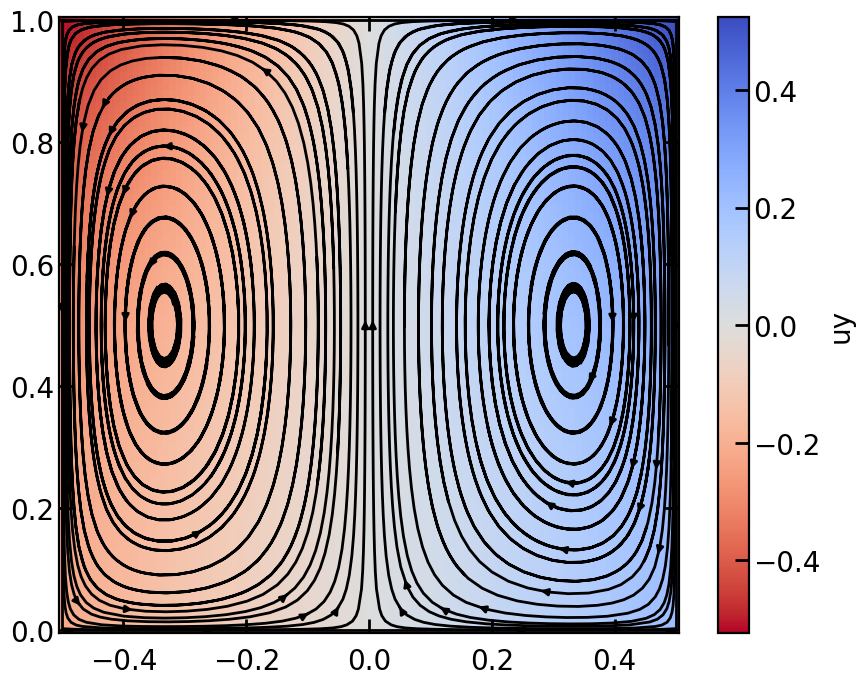

In [104]:
#plot analytical flow
fig,ax=plt.subplots()
lonsflow=flowset3D['lon'].values
latsflow=flowset3D['lat'].values
depthflow=flowset3D['depth'].values
depthgrid,latsgrid, longrid= np.meshgrid(depthflow,latsflow,lonsflow,indexing='ij')
Uflow=flowset3D['U'][0,:,:,:].values
Vflow=flowset3D['V'][0,:,:,:].values
Wflow=flowset3D['W'][0,:,:,:].values
speedflow=np.sqrt(Uflow**2+Vflow**2+Wflow**2)

ax.streamplot(longrid[:,50,:],depthgrid[:,50,:],Uflow[:,50,:],Wflow[:,50,:],color='k',broken_streamlines=False)
pcm=ax.pcolormesh(longrid[:,50,:],depthgrid[:,50,:],Vflow[:,50,:],cmap='coolwarm_r')#,vmin=-0.3,vmax=0.3)
# ax.set_xlabel("X")
# ax.set_ylabel("Z")
# cbar=fig.colorbar(pcm,label='$U_{y}$')
# ax.streamplot(longrid,latsgrid,Uflow,Vflow,color='k')
# pcm=ax.pcolormesh(longrid,latsgrid,np.sqrt(Uflow**2+Vflow**2),cmap='Blues')
# ax.set_xlabel("X [m]")
# ax.set_ylabel("Y [m]")
cbar=fig.colorbar(pcm,label='uy')

## Advection with MR equation

In [173]:
dataset3D_MR={}


0.0658389261744967
